Напишем своего Telegram-бота для получения данных о погоде в любом городе нашей планеты. Мы детально рассмотрим работу с API, парсинг JSON и напишем бота на асинхронной библиотеке aiogram. А после — загрузим его на виртуальный сервер и запустим.

Перед написанием кода нужно получить API-токены для работы с сервисом OpenWeather и Telegram-ботом, а также подготовить рабочее окружение.

Получаем токен OpenWeather
После того, как вы создали API-ключ, дайте ему немного «отлежаться» — обычно это занимает 10-15 минут. Спустя это время можно общаться с OpenWeather с помощью сгенерированного токена.

In [1]:
!pip install --force-reinstall -v "aiogram==2.23.1"

Using pip 23.2.1 from C:\Anaconda\Lib\site-packages\pip (python 3.11)
  Using cached aiogram-2.23.1-py3-none-any.whl (199 kB)
  Obtaining dependency information for aiohttp<3.9.0,>=3.8.0 from https://files.pythonhosted.org/packages/2e/9f/9c37b01fc6a37c92f139a4cd937a92f03ebbd75379cfd55e85ca1e571643/aiohttp-3.8.6-cp311-cp311-win_amd64.whl.metadata
  Using cached aiohttp-3.8.6-cp311-cp311-win_amd64.whl.metadata (7.9 kB)
  Using cached Babel-2.9.1-py2.py3-none-any.whl (8.8 MB)
  Obtaining dependency information for certifi>=2021.10.8 from https://files.pythonhosted.org/packages/64/62/428ef076be88fa93716b576e4a01f919d25968913e817077a386fcbe4f42/certifi-2023.11.17-py3-none-any.whl.metadata
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for magic-filter>=1.0.9 from https://files.pythonhosted.org/packages/cc/75/f620449f0056eff0ec7c1b1e088f71068eb4e47a46eb54f6c065c6ad7675/magic_filter-1.0.12-py3-none-any.whl.metadata
  Using cached magic_

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
jupyterlab-server 2.22.0 requires babel>=2.10, but you have babel 2.9.1 which is incompatible.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.10.0 which is incompatible.


In [43]:
import os
import datetime
import requests
import math
from aiogram import Bot, types, Dispatcher
from aiogram import executor
bot = Bot(token='6627542051:AAEZjRDntQfeS6KaoSaz2GozGxSFDIFpHLs')
dp = Dispatcher(bot)

In [3]:
!pip install config
!pip install nest-asyncio

Создание бота

Для начала проверим, что aiogram увидел бота и мы можем с ним взаимодействовать. Создадим простую асинхронную функцию start_command для ответа на команду /start. И добавляем метод start_polling для запуска бота.

In [40]:
import asyncio
import logging

#from aiogram import CommandStart, Command

import config

# dp = Dispatcher()
# bot = Bot(token='6627542051:AAEZjRDntQfeS6KaoSaz2GozGxSFDIFpHLs')

In [41]:
import nest_asyncio
nest_asyncio.apply()
bot = Bot(token='6627542051:AAEZjRDntQfeS6KaoSaz2GozGxSFDIFpHLs')
dp = Dispatcher(bot)

@dp.message_handler(commands="start")
async def start_command(message: types.Message):
    await message.reply("Привет! Напиши мне название города и я пришлю сводку погоды")


if __name__ == "__main__":
#С помощью метода executor.start_polling опрашиваем
#Dispatcher: ожидаем команду /start
    executor.start_polling(dp)

Goodbye!


Запускаем скрипт, заходим в Telegram и пишем команду /start — все работает: бот возвращает нужное сообщение.

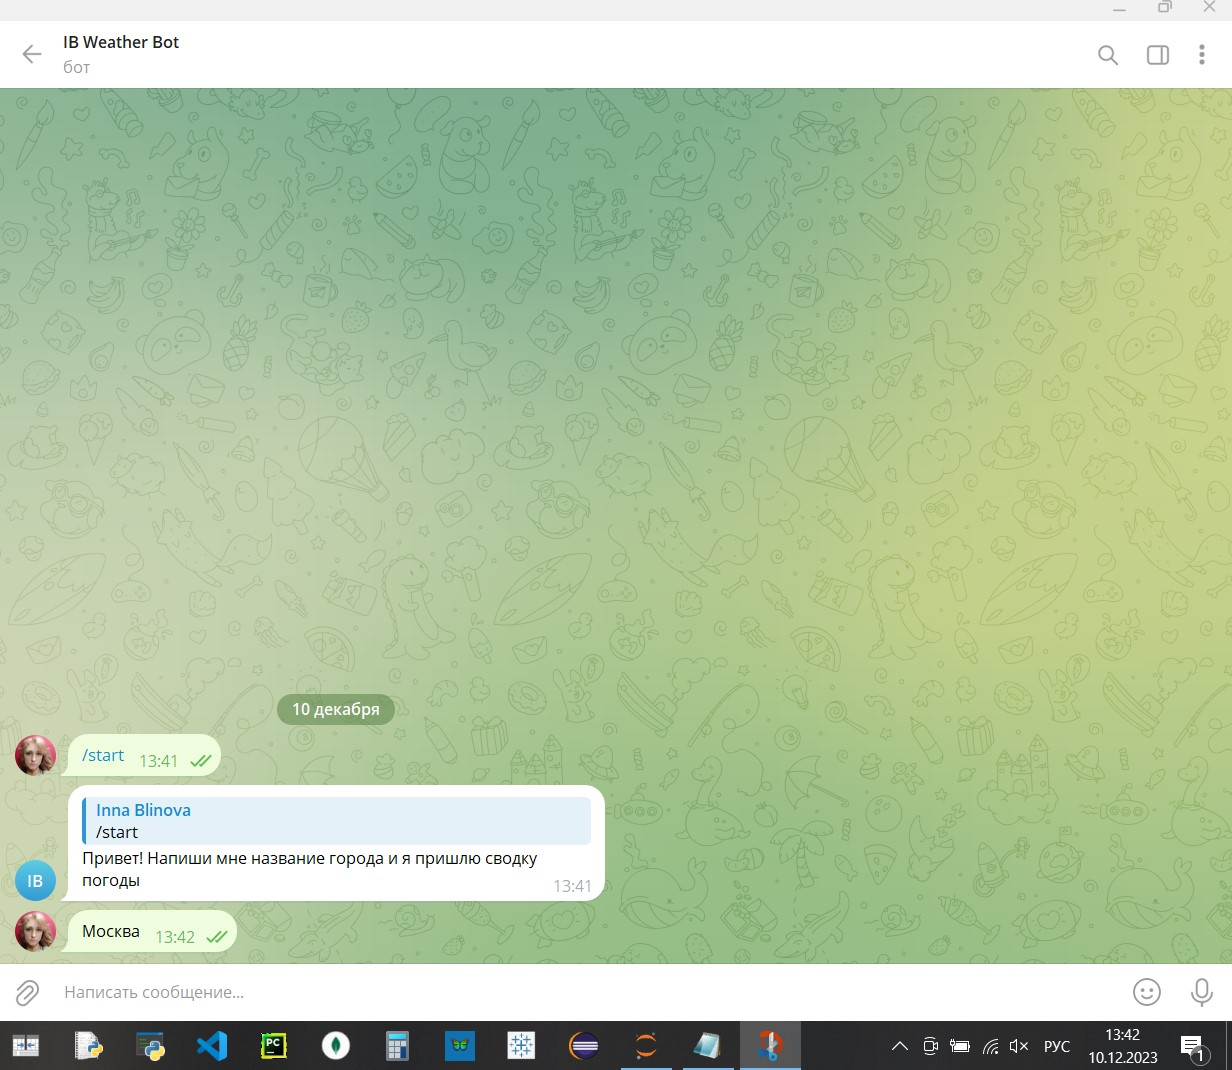

Теперь добавим функцию, которая будет реагировать на текстовые сообщения с названиями городов. Она должна проверять их на корректность и выводить ошибку, если валидация не была пройдена.

In [10]:
@dp.message_handler()
async def get_weather(message: types.Message):
    pass

#OpenWeather должен принимать название города через API и возвращать данные о погоде.
#Исходя из документации, кроме названия города запрос должен содержать API-токен.

Усовершенствуем запрос: в параметр q будем передавать город, добавим параметр lang=ru, чтобы API работал с кириллицей. А также используем units=metric для установки метрической системы:

In [38]:
#https://api.openweathermap.org/data/2.5/weather?q=москва&lang=ru&units=metric&APPID=f85fe01557bb38e5506a3007b7fe9fb8

In [49]:
#Теперь добавим блок try-except для обработки пользовательских запросов и
#создадим переменную для записи результатов OpenWeather, которые возвращает сервис в JSON-формате.

@dp.message_handler()
async def get_weather(message: types.Message):
    city = city
    response = requests.get(f"https://api.openweathermap.org/data/2.5/weather?q={city}&lang=ru&units=metric&APPID=8fefde8c77d72f1d6f1841e4909e804d")
    data = response.json()
    
   if __name__ == "__main__":
#С помощью метода executor.start_polling опрашиваем
#Dispatcher: ожидаем команду /start
    executor.start_polling(dp)
    

Goodbye!


Отправим запрос через браузер и посмотрим, какая температура, например, в Москве.

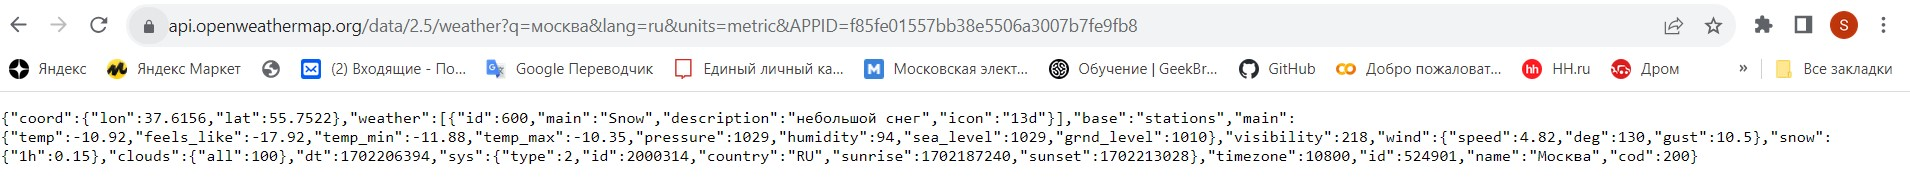

В ответе получаем не только данные о температуре, но и облачность, давление, влажность, время заката, рассвета и другие величины.

заберем данные о городе и температуре, влажности, давлении и скорости ветра

In [50]:
city = data["name"]
cur_temp = data["main"]["temp"]
humidity = data["main"]["humidity"]
pressure = data["main"]["pressure"]
wind = data["wind"]["speed"]

In [51]:
# получаем время рассвета и преобразуем его в читабельный формат
sunrise_timestamp = datetime.datetime.fromtimestamp(data["sys"]["sunrise"])

# то же самое проделаем со временем заката
sunset_timestamp = datetime.datetime.fromtimestamp(data["sys"]["sunset"])

Зная время рассвета и заката, мы можем вернуть пользователю продолжительность дня

In [ ]:
@dp.message_handler()
async def get_weather(message: types.Message):
    try:
response = requests.get(
f"http://api.openweathermap.org/data/2.5/weather?q=москва&lang=ru&units=metric&APPID=f85fe01557bb38e5506a3007b7fe9fb8"
)
data = response.json()
city = data["name"]
cur_temp = data["main"]["temp"]
humidity = data["main"]["humidity"]
pressure = data["main"]["pressure"]
wind = data["wind"]["speed"]

sunrise_timestamp = datetime.datetime.fromtimestamp(data["sys"]["sunrise"])
sunset_timestamp = datetime.datetime.fromtimestamp(data["sys"]["sunset"])

# продолжительность дня
length_of_the_day = datetime.datetime.fromtimestamp(data["sys"]["sunset"]) - datetime.datetime.fromtimestamp(data["sys"]["sunrise"])

except:
    await message.reply("Проверьте название города!")

Разнообразим текст сообщений — будем выводить разные эмодзи в зависимости от погоды.

У словаря, который мы ранее спарсили, есть ключ main — он хранит описание погоды. На его основе мы можем создать свою коллекцию с эмодзи под разные ситуации.

In [39]:
code_to_smile = {
"Clear": "Ясно \U00002600",
"Clouds": "Облачно \U00002601",
"Rain": "Дождь \U00002614",
"Drizzle": "Дождь \U00002614",
"Thunderstorm": "Гроза \U000026A1",
"Snow": "Снег \U0001F328",
"Mist": "Туман \U0001F32B"
}

In [ ]:
#в случае специфической погоды, для которой эмодзи не предусмотрен, программа выводит специальное сообщение
#получаем значение погоды
weather_description = data["weather"][0]["main"]

if weather_description in code_to_smile:
    wd = code_to_smile[weather_description]
else:
# если эмодзи для погоды нет, выводим другое сообщение
    wd = "Посмотри в окно, я не понимаю, что там за погода..."

Сформируем строки с датой и временем, погодой, влажностью и другими данными. Главное — учесть формат данных. Например, OpenWeather возвращает значение давления в гектопаскалях. Так, если вы хотите отдавать пользователю данные в миллиметрах ртутного столба, значение нужно разделить на 1.33 и округлить в большую сторону.

In [ ]:
await message.reply(f"{datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}"\n
     f"Погода в городе: {city}\nТемпература: {cur_temp}°C {wd}\n"
     f"Влажность: {humidity}%\nДавление: {math.ceil(pressure/1.333)} мм.рт.ст\nВетер: {wind} м/с \n"
     f"Восход солнца: {sunrise_timestamp}\nЗакат солнца: {sunset_timestamp}\nПродолжительность дня: {length_of_the_day}\n"
     f"Хорошего дня!"
)

### Запускаем бота

In [ ]:
@dp.message_handler(commands="start")
async def start_command(message: types.Message):
    await message.reply("Привет! Напиши мне название города и я пришлю сводку погоды")

@dp.message_handler()
async def get_weather(message: types.Message):
    
    response = requests.get(f"https://api.openweathermap.org/data/2.5/weather?q=москва&lang=ru&units=metric&APPID=8fefde8c77d72f1d6f1841e4909e804d")
    data = response.json()
    
    city = data["name"]
    cur_temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    pressure = data["main"]["pressure"]
    wind = data["wind"]["speed"]
    
    sunrise_timestamp = datetime.datetime.fromtimestamp(data["sys"]["sunrise"])

    sunset_timestamp = datetime.datetime.fromtimestamp(data["sys"]["sunset"])

    length_of_the_day = datetime.datetime.fromtimestamp(data["sys"]["sunset"]) - datetime.datetime.fromtimestamp(data["sys"]["sunrise"])

    code_to_smile = {
    "Clear": "Ясно \U00002600",
    "Clouds": "Облачно \U00002601",
    "Rain": "Дождь \U00002614",
    "Drizzle": "Дождь \U00002614",
    "Thunderstorm": "Гроза \U000026A1",
    "Snow": "Снег \U0001F328",
    "Mist": "Туман \U0001F32B"
    }

    weather_description = data["weather"][0]["main"]

    if weather_description in code_to_smile:
        wd = code_to_smile[weather_description]
    else:
    
        wd = "Посмотри в окно, я не понимаю, что там за погода..."
        
    await message.reply(f"{datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}"
     f"Погода в городе: {city}\nТемпература: {cur_temp}°C {wd}\n"
     f"Влажность: {humidity}%\nДавление: {math.ceil(pressure/1.333)} мм.рт.ст\nВетер: {wind} м/с \n"
     f"Восход солнца: {sunrise_timestamp}\nЗакат солнца: {sunset_timestamp}\nПродолжительность дня: {length_of_the_day}\n"
     f"Хорошего дня!"
)    
    
if __name__ == "__main__":

    executor.start_polling(dp)

бот работает и возвращает данные в удобочитаемом формате
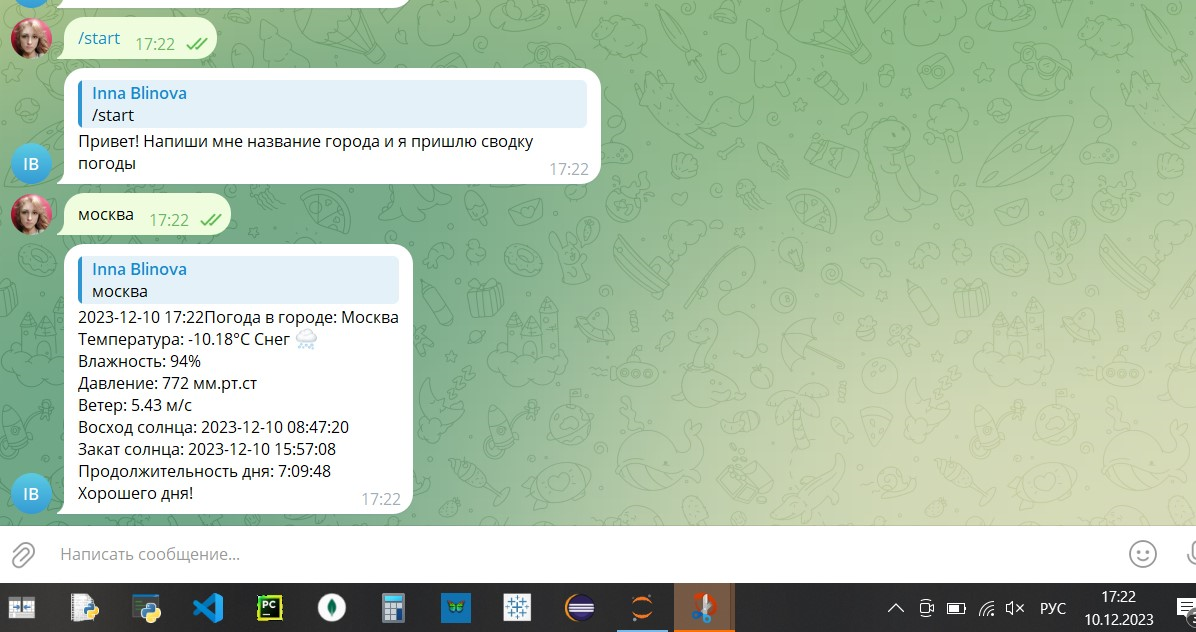
